In [5]:
import numpy as np
import math

def ComputeGausian(mu,var,x):
    #f(x | mu,var^2)
    f =(1/math.sqrt(2*np.pi*(var))) * np.exp(-1*((x-mu)**2)/(2*(var)))
    return f

def predict(mu1,var1,mu2,var2):
    if var1 == 0:
        var1 = 0.00001
    if var2 == 0:
        return mu2,var2
    #mu3,var3
    mu3 = (mu1*var2 +mu2*var1)/(var1+var2)
    var3 = 1/(1/var1 + 1/var2)
    return mu3,var3

def update(mu1,var1,mu2,var2):
    mu3 = mu1 + mu2
    var3 =var1 + var2
    return (mu3,var3)

In [4]:
ComputeGausian(8.0,10.0,8.0)

0.126156626101008

In [2]:
predict(5,2,15,2)

(10.0, 1.0)

In [6]:
update(5,10,15,2)

(20, 12)

In [7]:
update(3,4.5,9,0)

(12, 4.5)

In [2]:
import numpy as np
#get 2 list of measurment and return their covariance
def covariance(x1,x2):
    s = 0
    av1 = sum(x1)/len(x1)
    av2 = sum(x2)/len(x2)
    for i in range(len(x1)):
        s = s + (av1 - x1[i])*(av2 - x2[i])
    return s/len(x1)

def variance(var):
    av = sum(var)/len(var)
    s = 0
    for i in range(len(var)):
        s = s + ((av - var[i])**2)
    return (s/len(var))**0.5

def covarianceMatrix(x1):
    #each item in x1 is a list of results
    resMat = np.zeros((len(x1),len(x1)))
    
    for i in range(len(x1)):
        for j in range(len(x1)):
            
            if i == j:
                # the diagonal of the matrix is the varience of each list
                resMat[i][j] = (variance(x1[i]))**2
            elif i != j:
                resMat[i][j] = covariance(x1[i],x1[j])
                
    print(np.matrix(resMat))

In [3]:
x1 = [2,3,4,10,22,55,7.5]
x2 = [0.2,0.3,6,3,21,33,10]
print(covariance(x1,x2))
print(variance(x1))
print(variance(x2))

188.65
17.582168610874614
11.360206235552493


In [4]:
a = [[2,3,4,10,22,55,7.5],[0.2,0.3,6,3,21,33,10]]
covarianceMatrix(a)

[[309.13265306 188.65      ]
 [188.65       129.05428571]]


**Kalman filter 2-D**

In [52]:
import numpy as np
from numpy.linalg import inv

In [53]:
deltat = 1
oneFoot = 0.3048

sensorvariance = 0.5

x = np.matrix([[8],[5]])
fMatrix = np.matrix([[1.,1.],[0.,1.]])
pMatrix = np.matrix([[4,0],[0,1.44]])
hMatrix = np.matrix([1/oneFoot,0.])

print(f"the F Matrix \n {fMatrix}")
print(f"the P Matrix \n {pMatrix}")
print(f"the H Matrix \n {hMatrix}")

the F Matrix 
 [[1. 1.]
 [0. 1.]]
the P Matrix 
 [[4.   0.  ]
 [0.   1.44]]
the H Matrix 
 [[3.2808399 0.       ]]


***The prediction phase***

In [54]:
Z = np.matrix([[43]])
Qmatrix =0
I = np.matrix([[1,0],[0,1]])
x = fMatrix*x
pMatrix = fMatrix*pMatrix*fMatrix.T + Qmatrix

print(x)
print(f"The new P matrix \n {pMatrix}")

[[13.]
 [ 5.]]
The new P matrix 
 [[5.44 1.44]
 [1.44 1.44]]


**The Update phase**

In [55]:
rMatrix = np.matrix([sensorvariance**2])
S = hMatrix*pMatrix*hMatrix.T + rMatrix
S =inv(S)
K = pMatrix*hMatrix.T*S


x = x + K*(Z-hMatrix*x)
pMatrix = (I - K*hMatrix)*pMatrix

print("After Update:")

print("\nP matrix is:\n", pMatrix)
print("\nState Vector is:\n", x)
print("\nNew Kalman Gain (K):\n",K)

After Update:

P matrix is:
 [[0.02312702 0.00612186]
 [0.00612186 1.06044402]]

State Vector is:
 [[13.10594766]
 [ 5.02804497]]

New Kalman Gain (K):
 [[0.30350421]
 [0.08033935]]


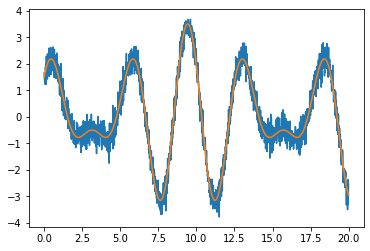

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
x = np.arange(0,20,0.01)
y = 2*np.sin(1.5*x)+ 1.5*np.cos(2*x)  +np.random.normal(0,0.3,len(x))
z = 2*np.sin(1.5*x)+ 1.5*np.cos(2*x)
plt.plot(x,y,x,z)

**RADAR AND LIDAR**

In [58]:
import numpy as np
import math
def from_state_to_radar(state_vector):
    ro = math.sqrt(state_vector[0]**2+state_vector[1]**2)
    fi = math.atan(state_vector[1]/state_vector[0])
    ro_dot = (state_vector[0]*state_vector[2]+state_vector[1]*state_vector[3]) / math.sqrt(state_vector[0]**2 + state_vector[1]**2)
    radar_vector = np.matrix([ro,fi,ro_dot])
   
    
    print(radar_vector)


In [59]:
from_state_to_radar([1,1,1,1])

[[1.41421356 0.78539816 1.41421356]]
